<a href="https://colab.research.google.com/github/Praveen3ravi/PROJECT---IMDB/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of IMDB reviews

## Data : 'https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data'

## Importing the data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('IMDB Dataset.csv')

In [56]:
df['sentiment'] = df['sentiment'].map({"positive":1 , "negative":0}) 
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



#### Removing punctuation (.!<>{}’,”(/)-\)

In [57]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z#]", " ") 


# Re ordering columns
df = df[['review','review_processed','sentiment']]

In [58]:
df.head()

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,A wonderful little production br br The...,1
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,Basically there s a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Mattei s Love in the Time of Money is...,1


#### Replacing short words

In [59]:
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [60]:
df.head(2)

,review,review_processed,sentiment
0,One of the other reviewers has mentioned that ...,One the other reviewers has mentioned that aft...,1
1,A wonderful little production. <br /><br />The...,wonderful little production The filming techni...,1


#### LowerCase character

In [61]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

#### Remove stop words

In [62]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
stop_words = stopwords.words('english')


# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization

In [63]:
# Begin Lemmatization 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Plotting Freqent Words

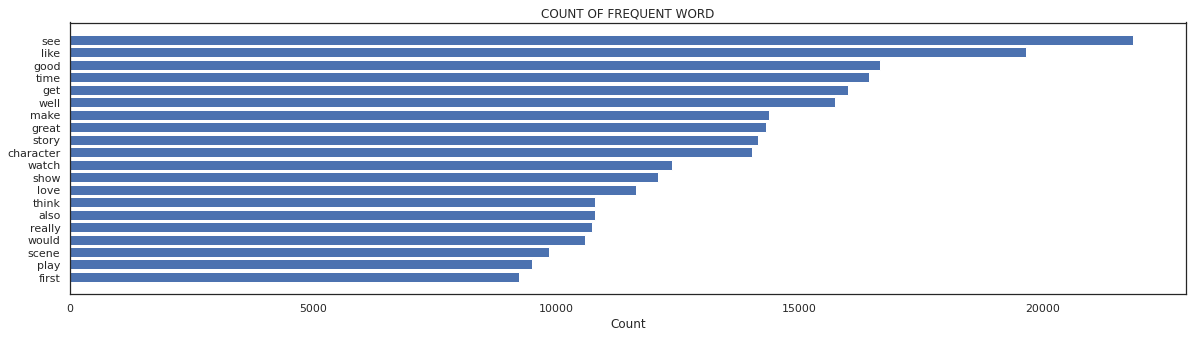

In [64]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

# Subset positive review dataset
all_words_df = df[df['sentiment'] == 1]

# Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df ['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
plt.barh(words_df['word'], width = words_df['count'])
plt.title('COUNT OF FREQUENT WORD')
plt.xlabel('Count')
# ax.set(ylabel = 'count')
plt.show()

#### WordCloud

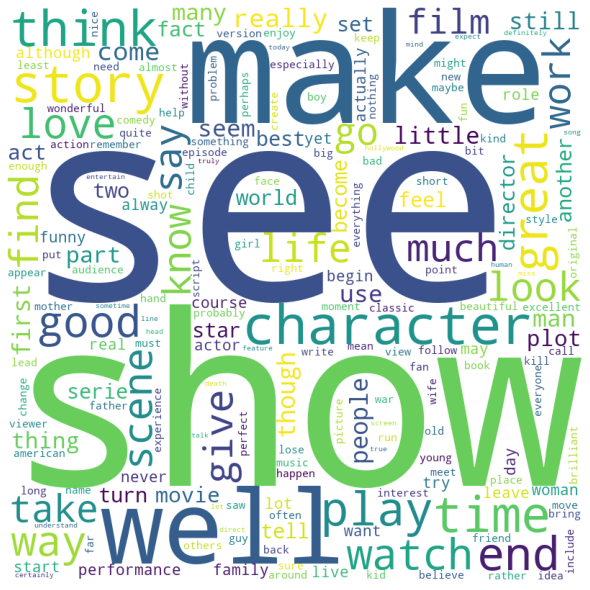

In [65]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df[df['sentiment'] == 1]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [66]:
# Importing module
from sklearn.feature_extraction.text import CountVectorizer

# Creating sparse matrix of top 2500 tokens
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(df.review_processed).toarray()
y = df.sentiment.values

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Building the ML model

In [67]:
## Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[4285  750]
 [1694 3271]]
The model accuracy is 0.7556
